<h2><center>American Sign Language Detection</center></h2>

***I've added the final model as a dataset link. Since running this notebook requires GPU consumtion and it's quite time consuming, if you just want the model, you may get it from here https://www.kaggle.com/namanmanchanda/american-sign-language-model-99-accuracy.***

Table of contents <a id=19></a>
1. [Importing packages](#1)
2. [Importing the dataset from training directory](#2)
    - 2.1 [Checking the shape of data](#3)
    - 2.2 [Checking the shape of one image](#4)
    - 2.3 [Viewing the image](#5)
3. [Data processing](#6)
    - 3.1 [Train/test split](#7)
    - 3.2 [One-Hot-Encoding](#8)
    - 3.3 [Dimension Check of variables](#9)
4. [Garbage Collection](#10)
5. [Modeling](#11)
    - 5.1 [Importing packages](#12)
    - 5.2 [Building the model](#13)
    - 5.3 [Early Stopping & Compiling](#14)
    - 5.4 [Model fitting](#15)
    - 5.5 [Model metrics](#16)
    - 5.6 [Predictions](#17)
    - 5.7 [Saving the model](#18)

### 1. Importing packages <a id=1></a>

In [3]:
conda install -c conda-forge opencv

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /Users/kritipaul/anaconda3

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.5.7   |       hf0a4a13_0         145 KB  conda-forge
    cairo-1.16.0               |       h29d4eff_2         941 KB
    certifi-2023.5.7           |     pyhd8ed1ab_0         149 KB  conda-forge
    eigen-3.4.0                |       hc021e02_0         1.2 MB  conda-forge
    ffmpeg-4.2.2               |       h04105a8_0        23.5 MB
    fontconfig-2.13.94         |       heb65262_0         289 KB  

In [5]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os

print("Packages imported...")

Packages imported...


### 2. Importing the dataset from training directory <a id=2></a>

In [8]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
train_dir = './asl_alphabet/asl_alphabet_train/asl_alphabet_train/'

def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(train_dir)
print("Images successfully imported...")

/var/folders/c3/508pf1ws6h1bdvylp4ymd7nh0000gn/T/ipykernel_17433/1263256875.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.empty((train_len,), dtype=np.int)


Images successfully imported...


#### 2.1 Checking the shape of data <a id=3></a>

In [9]:
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)

The shape of X_train is :  (87000, 64, 64, 3)
The shape of y_train is :  (87000,)


#### 2.2 Checking the shape of one image <a id=4></a>

In [10]:
print("The shape of one image is : ", X_train[0].shape)

The shape of one image is :  (64, 64, 3)


#### 2.3 Viewing the image <a id=5></a>

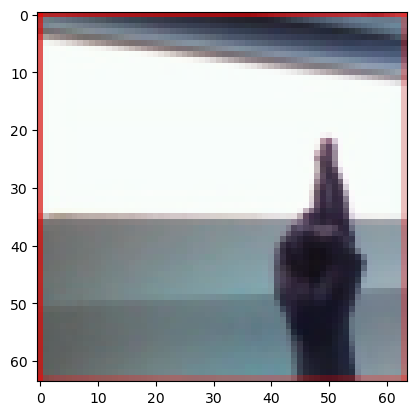

In [11]:
plt.imshow(X_train[0])
plt.show()

##### 2.3.1 Making copies of original data

In [12]:
X_data = X_train
y_data = y_train
print("Copies made...")

Copies made...


### 3. Data processing <a id=6></a>

#### 3.1 Train/test split <a id=7></a>

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)

#### 3.2 One-Hot-Encoding <a id=8></a>

In [14]:
# One-Hot-Encoding the categorical data
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

#### 3.3 Dimension Check of variables <a id=9></a>

In [15]:
# Checking the dimensions of all the variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(60900, 64, 64, 3)
(60900,)
(26100, 64, 64, 3)
(26100,)
(60900, 29)
(26100, 29)


### 4. Garbage Collection <a id=10></a>

In [16]:
# This is done to save CPU and RAM space while working on Kaggle Kernels. This will delete the specified data and save some space!
import gc
del X_data
del y_data
gc.collect()

4006

### 5. Modeling <a id=11></a>

#### 5.1 Importing packages <a id=12></a>

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
print("Packages imported...")

Packages imported...


#### 5.2 Building model <a id=13></a>

In [18]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

model.summary()

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 activation (Activation)     (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 6

#### 5.3 Early Stopping and Compiling <a id=14></a>

##### 5.3.1 Early Stopping

Early Stopping is done to make sure the model fitting stops at the most optimized accuracy point. After the early stopping point, the model might start overfitting. For testing purposes, this step can be skipped and complete training can be done.

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

##### 5.3.2 Compiling

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### 5.4 Model fitting <a id=15></a>

In [21]:
model.fit(X_train, y_cat_train,
          epochs=50,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/50


2023-05-31 11:46:45.120284: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


952/952 - 41s - loss: 3.3676 - accuracy: 0.0322 - val_loss: 3.3713 - val_accuracy: 0.0391 - 41s/epoch - 43ms/step
Epoch 2/50
952/952 - 33s - loss: 3.3676 - accuracy: 0.0332 - val_loss: 3.3713 - val_accuracy: 0.0383 - 33s/epoch - 35ms/step
Epoch 3/50
952/952 - 32s - loss: 3.3676 - accuracy: 0.0333 - val_loss: 3.3714 - val_accuracy: 0.0368 - 32s/epoch - 34ms/step


#### 5.5 Model metrics <a id=16></a>

##### 5.5.1 Metrics from model history

In [22]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,3.367564,0.032184,3.371272,0.039119
1,3.367565,0.033186,3.371314,0.038314
2,3.367582,0.033317,3.371386,0.036820


##### 5.5.2 Plotting the training loss

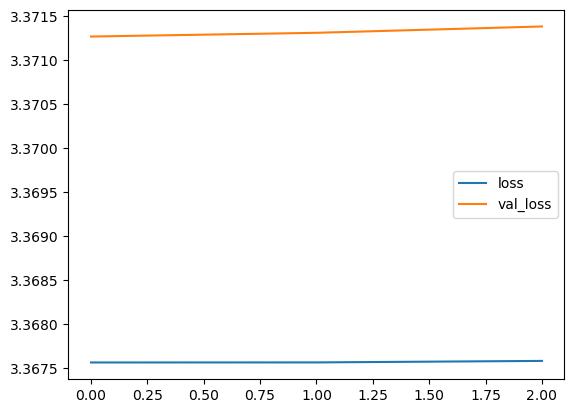

In [23]:
metrics[['loss','val_loss']].plot()
plt.show()

##### 5.5.3 Plotting the testing loss

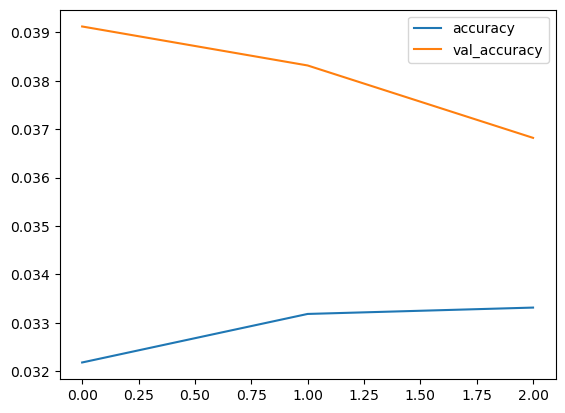

In [24]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

##### 5.5.4 Model evaluation

In [25]:
model.evaluate(X_test,y_cat_test,verbose=0)

[3.371387481689453, 0.03681992366909981]

#### 5.6 Predictions <a id=17></a>

In [26]:
# predictions = model.predict_classes(X_test)
# predictions = model.predict(X_test)
predictions = np.argmax(model.predict(X_test), axis=-1)
print("Predictions done...")

816/816 [==============================] - 8s 9ms/step
Predictions done...


##### 5.6.1 Classification report

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       900
           1       0.00      0.00      0.00       900
           2       0.00      0.00      0.00       900
           3       0.00      0.00      0.00       900
           4       0.00      0.00      0.00       900
           5       0.00      0.00      0.00       900
           6       0.00      0.00      0.00       900
           7       0.00      0.00      0.00       900
           8       0.00      0.00      0.00       900
           9       0.00      0.00      0.00       900
          10       0.00      0.00      0.00       900
          11       0.06      0.08      0.07       900
          12       0.04      0.04      0.04       900
          13       0.00      0.00      0.00       900
          14       0.00      0.00      0.00       900
          15       0.04      0.85      0.07       900
          16       0.00      0.00      0.00       900
          17       0.00    

/Users/kritipaul/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kritipaul/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kritipaul/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 5.6.2 Confusion matrix heatmap

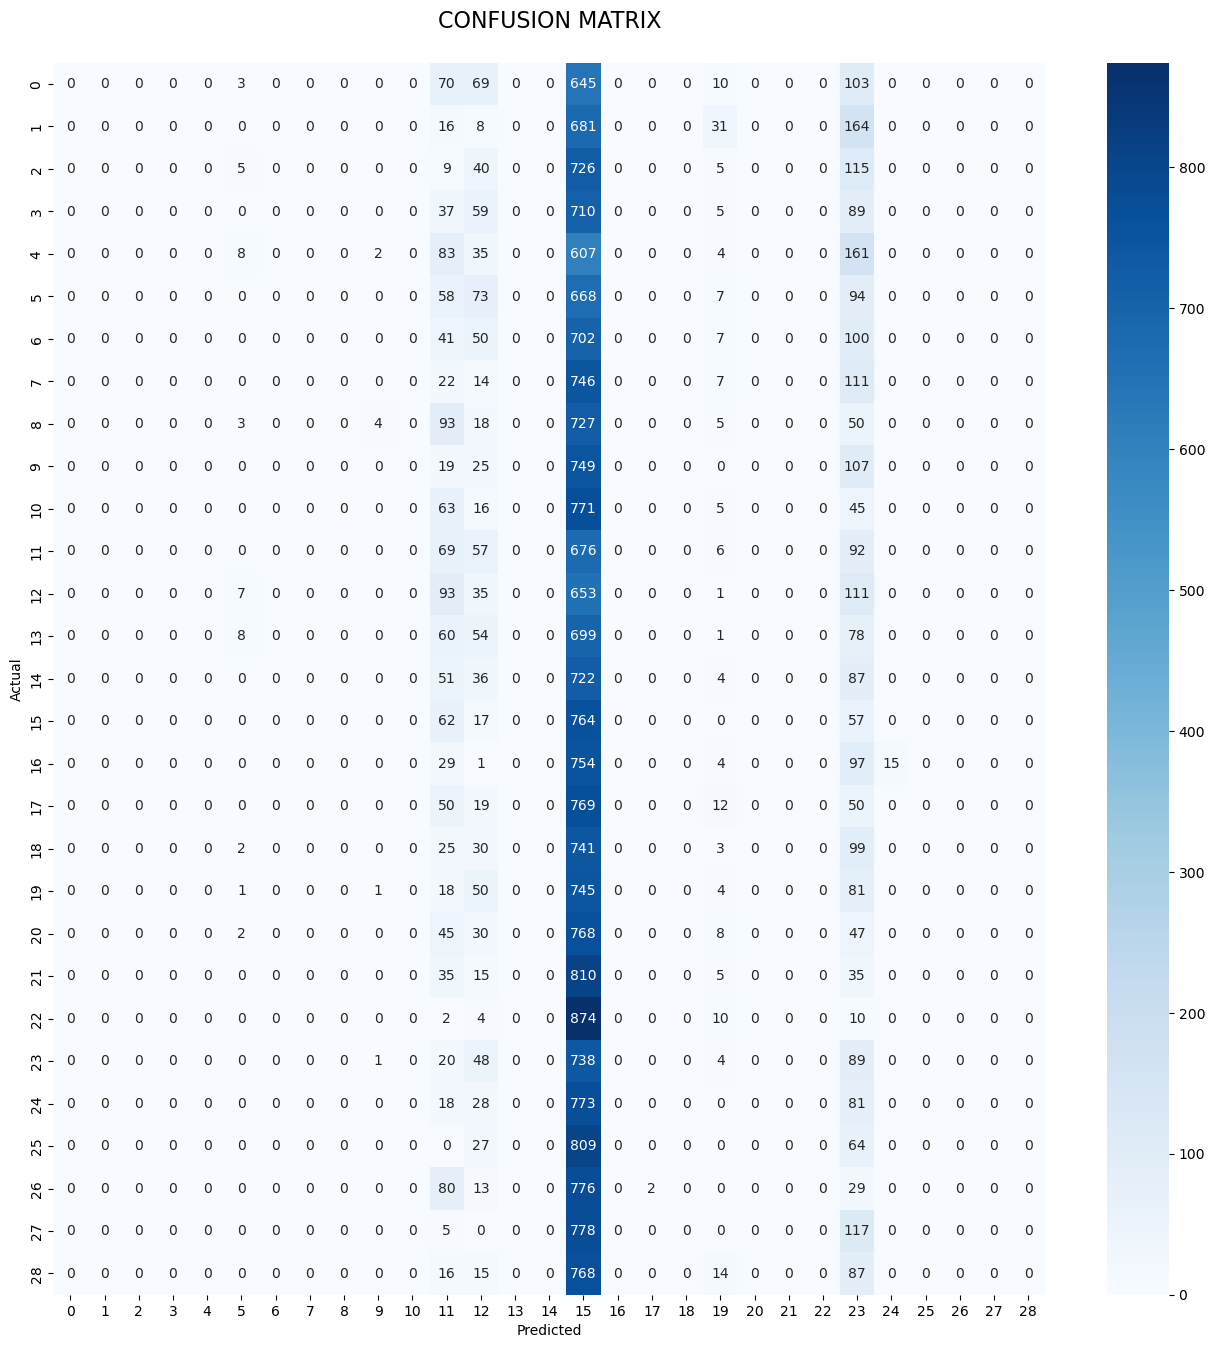

In [28]:
conf_mat = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',)
            # xticklabels=category_id_df.Product.values, 
            # yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX\n", size=16);

In [29]:
# plt.figure(figsize=(12,12))
# sns.heatmap(confusion_matrix(y_test,predictions))
# plt.show()

#### 5.7 Saving the model <a id=18></a>

In [30]:
# from keras.models import load_model
model.save('ASL.h5')
print("Model saved successfully...")

Model saved successfully...


### INTERFACE

In [31]:
class_names = [str(i) for i in range(30)]
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']


In [32]:
# import string

# alphabet = string.ascii_lowercase  # contains all lowercase letters a-z
# string_dict = {str(i): char for i, char in enumerate(alphabet)}

# # Example usage
# print(string_dict['0'])  # output: 'a'
# print(string_dict['1'])  # output: 'b'

# print(string_dict)

# string_dict = {'0': 'a', '1': 'b', '2': 'c', '3': 'd', '4': 'e', '5': 'f', '6': 'g', '7': 'h', '8': 'i', '9': 'j', '10': 'k', '11': 'l', '12': 'm', '13': 'n', '14': 'o', '15': 'p', '16': 'q', '17': 'r', '18': 's', '19': 't', '20': 'u', '21': 'v', '22': 'w', '23': 'x', '24': 'y', '25': 'z', '26': 'del', '27': 'nothing', '28': 'space'}

# int_dict = {int(k): v for k, v in string_dict.items()}
# print(int_dict)



In [34]:
import gradio as gr
from PIL import Image

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
string_dict = {'0': 'a', '1': 'b', '2': 'c', '3': 'd', '4': 'e', '5': 'f', '6': 'g', '7': 'h', '8': 'i', '9': 'j', '10': 'k', '11': 'l', '12': 'm', '13': 'n', '14': 'o', '15': 'p', '16': 'q', '17': 'r', '18': 's', '19': 't', '20': 'u', '21': 'v', '22': 'w', '23': 'x', '24': 'y', '25': 'z', '26': 'del', '27': 'nothing', '28': 'space'}

def predict_image(img):
  img_3d=img.reshape(64,64,3)
  im_resize=img_3d/255.0
  prediction=model.predict(im_resize)
  pred=np.argmax(prediction)
  return class_names[pred]

def predict_image(img):
  img_3d=img.reshape(64,64,3)
  im_resize=img_3d/255.0
  # prediction=model.predict(im_resize)
  # img_4d = im_resize.reshape(-1, 28, 28, 1)
  img_4d = np.expand_dims(im_resize, axis=0)
  prediction = model.predict(img_4d)[0]
  return {string_dict[class_names[i]]: float(prediction[i]) for i in range(29)}


/Users/kritipaul/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
image = gr.inputs.Image(shape=(64, 64))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label, interpretation='default',
             title='American Sign Language Prediction', 
             description='Select an image of a sign language letter and the model will predict the letter.'
             ).launch(debug='True')

/Users/kritipaul/anaconda3/lib/python3.10/site-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/Users/kritipaul/anaconda3/lib/python3.10/site-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/Users/kritipaul/anaconda3/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/Users/kritipaul/anaconda3/lib/python3.10/site-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 16ms/step
Keyboard interruption in main thread... closing server.
